# Fraud detection

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from xverse.ensemble import VotingSelector
from xverse.feature_subset import SplitXY
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_excel('brazilian credit card.xlsx')
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374823 entries, 0 to 374822
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   mcc_cat numeric              374823 non-null  int64
 1   mcc_ant_cat numeric          374823 non-null  int64
 2   cep_cat numeric              374823 non-null  int64
 3   cep_ant_cat numeric          374823 non-null  int64
 4   valor_trans_cat numeric      374823 non-null  int64
 5   valor_trans_ant_cat numeric  374823 non-null  int64
 6   pos_entry numeric            374823 non-null  int64
 7   lim_cred_cat numeric         374823 non-null  int64
 8   bandeira_cat numeric         374823 non-null  int64
 9   variante_cat numeric         374823 non-null  int64
 10  score_cat numeric            374823 non-null  int64
 11  tp_pessoa_cat numeric        374823 non-null  int64
 12  trans_nacional_cat numeric   374823 non-null  int64
 13  qtde_parc_cat numeric        

,mcc_cat numeric,mcc_ant_cat numeric,cep_cat numeric,cep_ant_cat numeric,valor_trans_cat numeric,valor_trans_ant_cat numeric,pos_entry numeric,lim_cred_cat numeric,bandeira_cat numeric,variante_cat numeric,score_cat numeric,tp_pessoa_cat numeric,trans_nacional_cat numeric,qtde_parc_cat numeric,velocidade_cat numeric,dif_score_cat numeric,trans_limit_cat numeric,Class
0,9,22,3,3,6,6,2,6,2,3,0,1,0,1,7,1,0,0
1,22,22,3,3,7,7,2,6,2,3,0,1,0,1,4,4,0,0
2,22,22,3,3,7,7,2,6,2,3,3,1,0,1,6,5,0,1
3,9,0,2,0,4,1,2,4,2,3,0,1,0,1,2,3,0,0
4,15,9,2,2,4,4,2,4,2,3,0,1,0,1,3,3,0,0


In [4]:
df.describe()

,mcc_cat numeric,mcc_ant_cat numeric,cep_cat numeric,cep_ant_cat numeric,valor_trans_cat numeric,valor_trans_ant_cat numeric,pos_entry numeric,lim_cred_cat numeric,bandeira_cat numeric,variante_cat numeric,score_cat numeric,tp_pessoa_cat numeric,trans_nacional_cat numeric,qtde_parc_cat numeric,velocidade_cat numeric,dif_score_cat numeric,trans_limit_cat numeric,Class
count,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000,374823.000000
mean,10.903594,6.631066,3.903498,2.287608,4.992148,3.362643,3.834394,5.897376,2.348597,2.015295,0.627632,0.983144,0.004898,1.210195,3.365092,2.933561,0.069945,0.037434
std,6.264215,7.300236,2.441054,2.648531,2.434372,2.712998,3.159801,2.430863,1.717701,0.835288,1.699094,0.128732,0.069816,0.466723,1.706867,0.984662,0.399692,0.189822
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000
50%,9.000000,6.000000,4.000000,1.000000,5.000000,2.000000,2.000000,6.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000
75%,15.000000,12.000000,6.000000,4.000000,7.000000,5.000000,9.000000,8.000000,5.000000,3.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,0.000000
max,32.000000,32.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,9.000000,1.000000,1.000000,3.000000,7.000000,5.000000,9.000000,1.000000


In [5]:
df.shape

(374823, 18)

## Visualization

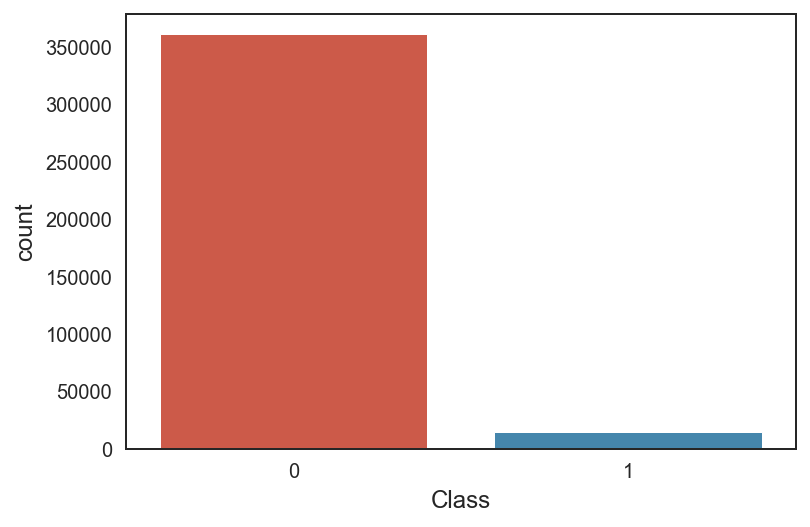

In [6]:
sns.countplot(x='Class', data=df);

In [7]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : ",classes[0]," ",normal_share,"%")
print("    Fraudulent : ",classes[1]," ",fraud_share,"%")


Non-Fraudulent :  360792   96.26 %
    Fraudulent :  14031   3.74 %


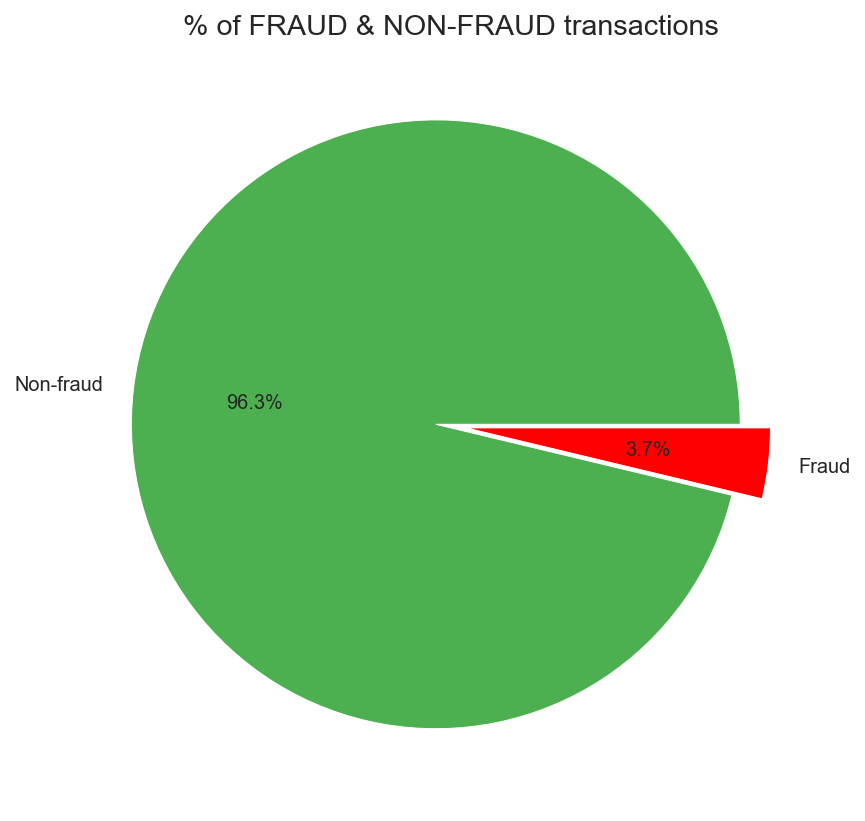

In [8]:
pie, ax = plt.subplots(figsize=[7,7])
labels = ['Non-fraud', 'Fraud']
colors = ['Salmon', 'Chartreuse']
plt.pie(x = classes, autopct='%.1f%%', explode=[0.05]*2,colors=['#4CAF50','r'] ,labels=labels)
plt.title('% of FRAUD & NON-FRAUD transactions')
plt.show()

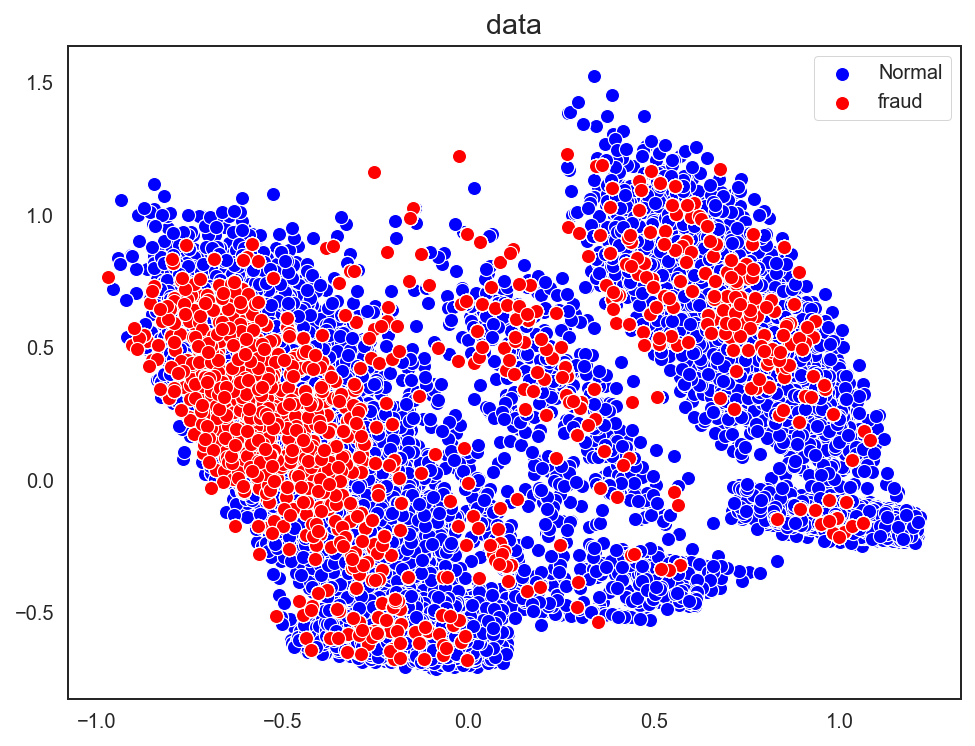

Wall time: 6.46 s


In [9]:
%%time
y1=df['Class']
x1=df.drop('Class',axis=1)

scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1)

pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

In [10]:
df.shape

(374823, 18)

## **Feature Engineering**

**plot a correlation table of features**

In [11]:
#Add a lable to the first column of the table
Target=pd.DataFrame(df['Class'])
df.drop(['Class'],axis=1,inplace=True)
df = pd.concat([Target, df], axis=1)

In [12]:
df.shape

(374823, 18)

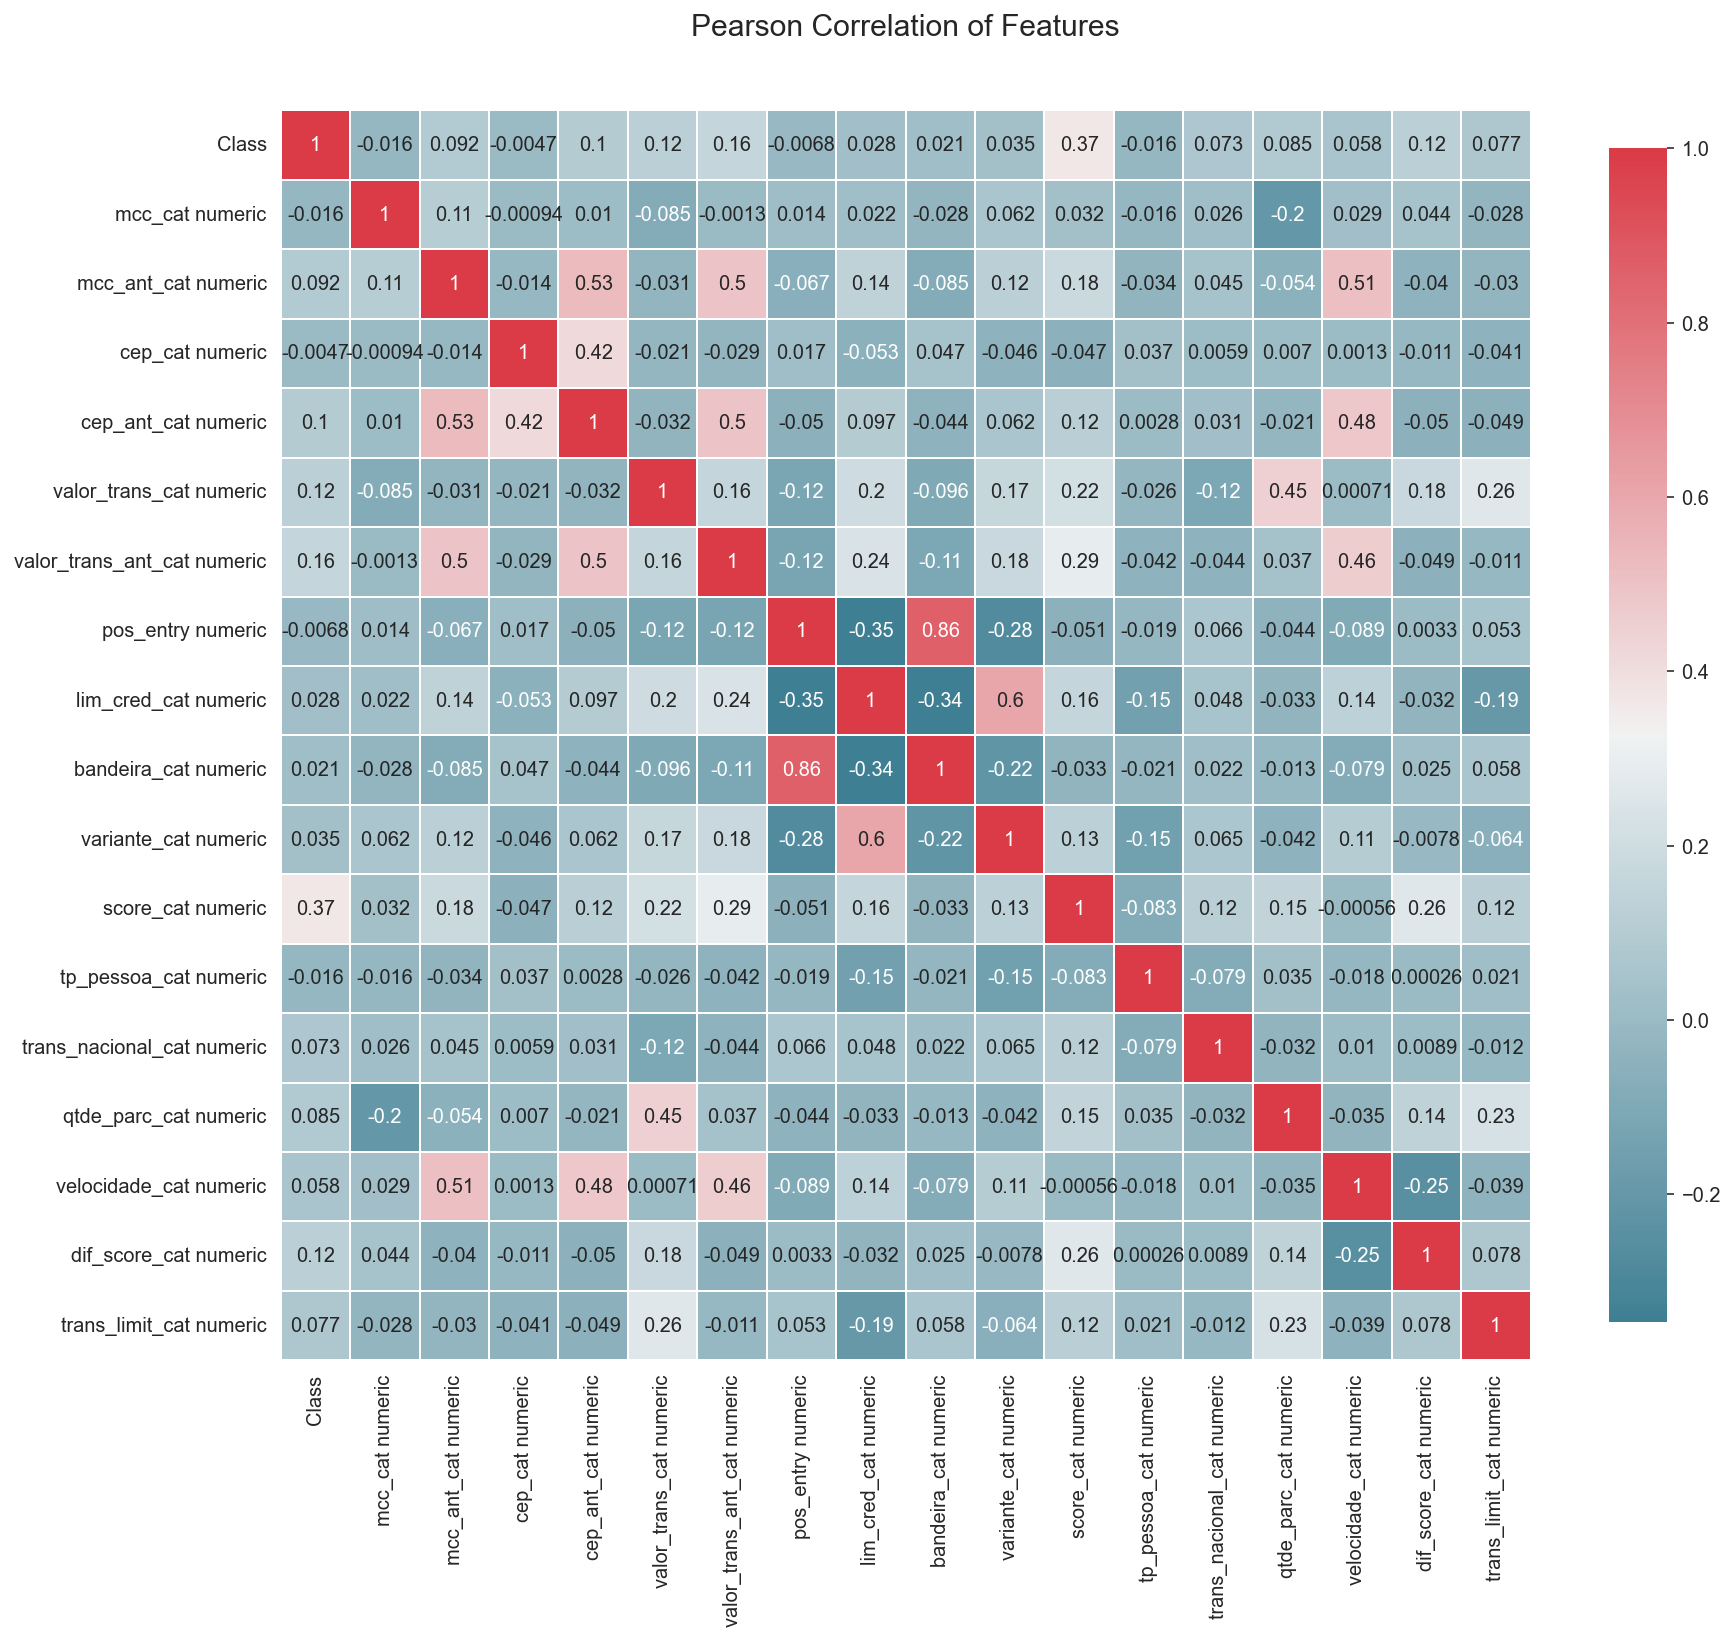

In [13]:
def correlation_heatmap(df, type):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=type), #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df, 'pearson')

**feature selection**

In [14]:
#The results may be different for each run
clf = SplitXY(['Class']);
X, y = clf.fit_transform(df);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0);
print(X_train.shape,y_train.shape)
clf = VotingSelector();
clf.fit(X_train, y_train);
clf.feature_importances_

(262376, 17) (262376,)


,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,score_cat numeric,1.378288,0.140602,0.375221,0.148651,18138.235064,0.078175
1,dif_score_cat numeric,0.974529,0.056555,0.136815,0.054346,481.533466,0.013747
2,valor_trans_ant_cat numeric,0.431391,0.077268,0.112505,0.073729,2665.612571,0.008035
3,valor_trans_cat numeric,0.395778,0.079891,0.120328,0.076488,702.880154,0.012234
4,cep_ant_cat numeric,0.210097,0.071110,0.000000,0.066354,892.844791,0.010862
5,qtde_parc_cat numeric,0.140269,0.029468,0.000000,0.031793,937.868189,-0.004994
6,velocidade_cat numeric,0.136294,0.070145,0.189573,0.071250,182.220195,0.014014
7,mcc_ant_cat numeric,0.075711,0.086182,0.000000,0.074801,562.475582,-0.000791
8,mcc_cat numeric,0.067823,0.086376,0.000000,0.077983,8.358995,-0.002659
9,trans_nacional_cat numeric,0.062461,0.006365,2.042781,0.007821,1612.368528,0.276963


In [15]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
0,score_cat numeric,1,1,1,1,1,1,6
3,valor_trans_cat numeric,1,1,1,1,1,1,6
2,valor_trans_ant_cat numeric,1,1,1,1,1,0,5
4,cep_ant_cat numeric,1,1,0,0,1,1,4
6,velocidade_cat numeric,1,0,1,1,0,1,4
7,mcc_ant_cat numeric,1,1,0,1,1,0,4
1,dif_score_cat numeric,1,0,1,0,1,1,4
14,lim_cred_cat numeric,0,1,0,1,0,1,3
9,trans_nacional_cat numeric,0,0,1,0,1,1,3
12,cep_cat numeric,0,1,0,1,0,0,2


In [16]:
vars_selected_unbalanced = clf.feature_votes_[clf.feature_votes_['Votes'] >= 2]['Variable_Name']
print(vars_selected_unbalanced)

0               score_cat numeric
3         valor_trans_cat numeric
2     valor_trans_ant_cat numeric
4             cep_ant_cat numeric
6          velocidade_cat numeric
7             mcc_ant_cat numeric
1           dif_score_cat numeric
14           lim_cred_cat numeric
9      trans_nacional_cat numeric
12                cep_cat numeric
13           bandeira_cat numeric
8                 mcc_cat numeric
5           qtde_parc_cat numeric
Name: Variable_Name, dtype: object


In [17]:
df.drop(['Class'],axis=1,inplace=True)

In [18]:
selected_vars = list((set(vars_selected_unbalanced)))

In [19]:
df1=df[selected_vars]

In [20]:
df1.head()

,cep_cat numeric,score_cat numeric,velocidade_cat numeric,bandeira_cat numeric,qtde_parc_cat numeric,valor_trans_cat numeric,trans_nacional_cat numeric,mcc_cat numeric,valor_trans_ant_cat numeric,mcc_ant_cat numeric,dif_score_cat numeric,cep_ant_cat numeric,lim_cred_cat numeric
0,3,0,7,2,1,6,0,9,6,22,1,3,6
1,3,0,4,2,1,7,0,22,7,22,4,3,6
2,3,3,6,2,1,7,0,22,7,22,5,3,6
3,2,0,2,2,1,4,0,9,1,0,3,0,4
4,2,0,3,2,1,4,0,15,4,9,3,2,4


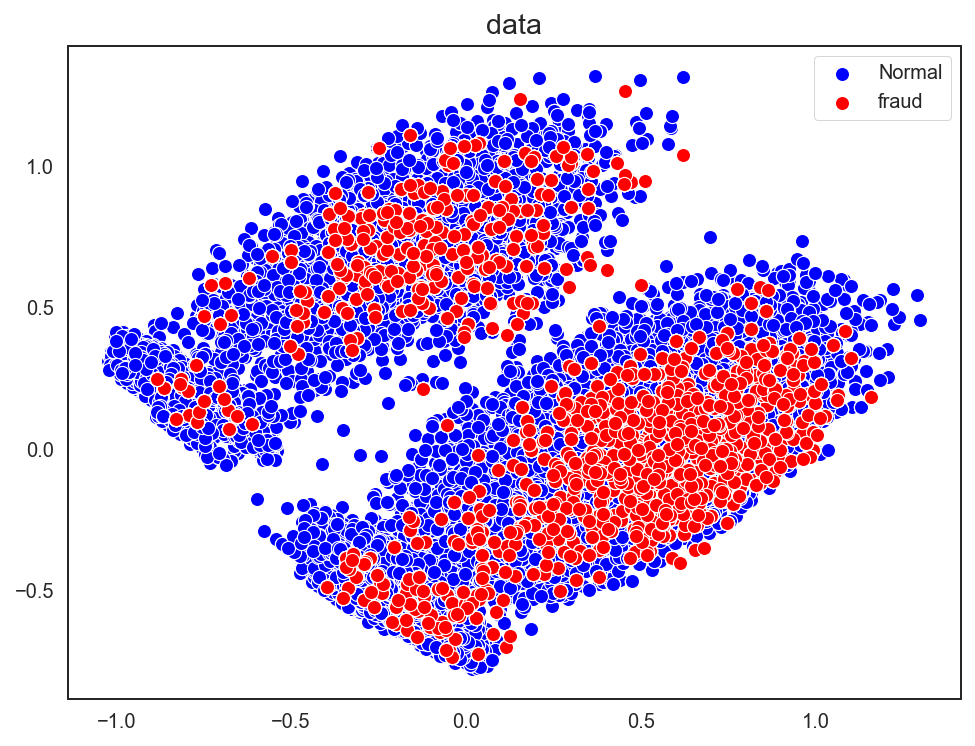

In [21]:
x1=df1
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

Final Dataframe

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374823 entries, 0 to 374822
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   cep_cat numeric              374823 non-null  int64
 1   score_cat numeric            374823 non-null  int64
 2   velocidade_cat numeric       374823 non-null  int64
 3   bandeira_cat numeric         374823 non-null  int64
 4   qtde_parc_cat numeric        374823 non-null  int64
 5   valor_trans_cat numeric      374823 non-null  int64
 6   trans_nacional_cat numeric   374823 non-null  int64
 7   mcc_cat numeric              374823 non-null  int64
 8   valor_trans_ant_cat numeric  374823 non-null  int64
 9   mcc_ant_cat numeric          374823 non-null  int64
 10  dif_score_cat numeric        374823 non-null  int64
 11  cep_ant_cat numeric          374823 non-null  int64
 12  lim_cred_cat numeric         374823 non-null  int64
dtypes: int64(13)
memory usage: 37

In [23]:
selected_vars

['cep_cat numeric',
 'score_cat numeric',
 'velocidade_cat numeric',
 'bandeira_cat numeric',
 'qtde_parc_cat numeric',
 'valor_trans_cat numeric',
 'trans_nacional_cat numeric',
 'mcc_cat numeric',
 'valor_trans_ant_cat numeric',
 'mcc_ant_cat numeric',
 'dif_score_cat numeric',
 'cep_ant_cat numeric',
 'lim_cred_cat numeric']